In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shriaguntunur","key":"2146c79320026ec0724c8eb932905956"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d meetnagadia/netflix-stock-price-data-set-20022022

  0% 0.00/96.3k [00:00<?, ?B/s]
100% 96.3k/96.3k [00:00<00:00, 44.4MB/s]


In [7]:
!unzip netflix-stock-price-data-set-20022022.zip

Archive:  netflix-stock-price-data-set-20022022.zip
  inflating: NFLX.csv                


In [8]:
import os
os.rename('NFLX.csv','data.csv')

In [9]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('data.csv') #reading the data

In [11]:
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [13]:
print(data.shape) #number of rows and columns
print(data.size) #total number of data

(5044, 7)
35308


In [14]:
data.describe() #getting summary statistics

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [15]:
print(data.isna().any().any())  #check for missing values
print(data.isnull().sum())
print(data.loc[:, data.isnull().any()].columns)
data1=data.dropna()
if(data.equals(data1)):
  print('No missing values')
#There are no missing values in any of the columns of the dataset.

False
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Index([], dtype='object')
No missing values


Number of outliers are:  502
The following are the outliers in the boxplot:4043    384.269989
4044    390.709991
4045    387.720001
4046    389.500000
4047    415.149994
           ...    
4979    386.000000
4997    384.390015
4998    389.549988
4999    383.589996
5002    389.299988
Name: Open, Length: 502, dtype: float64
Number of outliers are:  52
The following are the extreme outliers in the boxplot:4875    613.390015
4877    628.179993
4878    642.229980
4879    634.169983
4880    633.200012
4881    633.020020
4882    632.179993
4883    632.229980
4884    638.000000
4885    632.099976
4886    636.969971
4887    625.570007
4888    628.890015
4889    651.809998
4890    663.739990
4891    673.760010
4892    669.000000
4893    670.950012
4894    673.059998
4895    689.059998
4896    683.109985
4897    677.270020
4898    685.890015
4899    663.969971
4900    650.289978
4901    653.700012
4902    653.010010
4903    650.239990
4904    660.010010
4905    681.239990
4906    678.270020
4907 

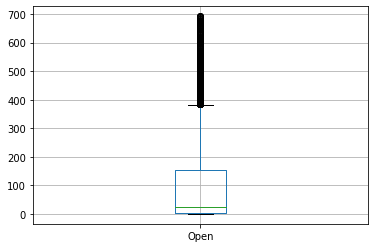

In [16]:
boxplot = data.boxplot(column=['Open'])
q1 = np.quantile(data['Open'], 0.25)
q3 = np.quantile(data['Open'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['Open'][(data['Open'] <= lower_bound) | (data['Open'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

#Number of extreme outliers
upper_bound = q3+(3*iqr)
lower_bound = q1-(3*iqr)
outliers = data['Open'][(data['Open'] <= lower_bound) | (data['Open'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the extreme outliers in the boxplot:{}'.format(outliers))

Number of outliers are:  501
The following are the outliers in the boxplot:4043    392.869995
4044    391.980011
4045    390.399994
4046    404.980011
4047    416.760010
           ...    
4975    390.799988
4976    394.519989
4977    386.239990
4997    391.820007
5001    391.500000
Name: Close, Length: 501, dtype: float64


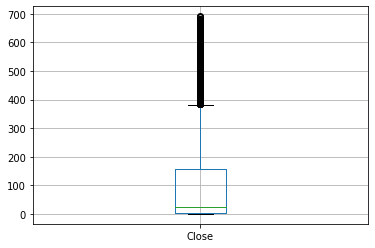

In [17]:
boxplot = data.boxplot(column=['Close'])
q1 = np.quantile(data['Close'], 0.25)
q3 = np.quantile(data['Close'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['Close'][(data['Close'] <= lower_bound) | (data['Close'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

Number of outliers are:  501
The following are the outliers in the boxplot:4043    392.869995
4044    391.980011
4045    390.399994
4046    404.980011
4047    416.760010
           ...    
4975    390.799988
4976    394.519989
4977    386.239990
4997    391.820007
5001    391.500000
Name: Adj Close, Length: 501, dtype: float64


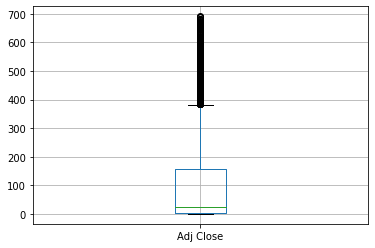

In [18]:
boxplot = data.boxplot(column=['Adj Close'])
q1 = np.quantile(data['Adj Close'], 0.25)
q3 = np.quantile(data['Adj Close'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['Adj Close'][(data['Adj Close'] <= lower_bound) | (data['Adj Close'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

Number of outliers are:  491
The following are the outliers in the boxplot:4043    383.250000
4044    387.510010
4045    386.500000
4046    388.500000
4047    409.600006
           ...    
4970    385.700012
4971    389.049988
4976    382.130005
4977    383.709991
4997    380.329987
Name: Low, Length: 491, dtype: float64


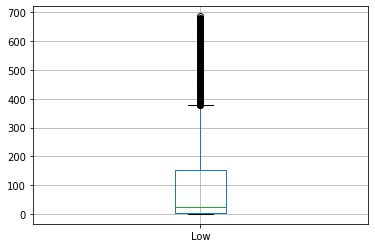

In [19]:
boxplot = data.boxplot(column=['Low'])
q1 = np.quantile(data['Low'], 0.25)
q3 = np.quantile(data['Low'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['Low'][(data['Low'] <= lower_bound) | (data['Low'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

Number of outliers are:  504
The following are the outliers in the boxplot:4043    395.029999
4044    398.859985
4045    393.160004
4046    405.290009
4047    419.470001
           ...    
4978    389.220001
4997    396.500000
4998    392.700012
5001    396.019989
5002    390.000000
Name: High, Length: 504, dtype: float64


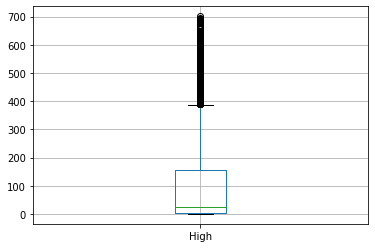

In [20]:
boxplot = data.boxplot(column=['High'])
q1 = np.quantile(data['High'], 0.25)
q3 = np.quantile(data['High'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['High'][(data['High'] <= lower_bound) | (data['High'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

Number of outliers are:  336
The following are the outliers in the boxplot:0       104790000
228      48573000
263      62433000
266      66024000
343      73129000
          ...    
3814     41587400
4065     58410400
4951     58904300
5012    133387500
5013     53501600
Name: Volume, Length: 336, dtype: int64


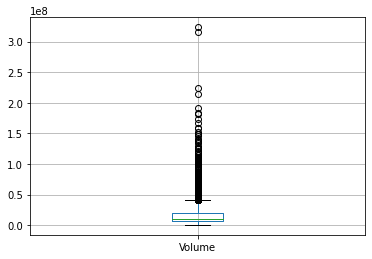

In [21]:
boxplot = data.boxplot(column=['Volume'])
q1 = np.quantile(data['Volume'], 0.25)
q3 = np.quantile(data['Volume'], 0.75)
iqr=q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = data['Volume'][(data['Volume'] <= lower_bound) | (data['Volume'] >= upper_bound)]
print("Number of outliers are: ",len(outliers))
print('The following are the outliers in the boxplot:{}'.format(outliers))

We can see from the boxplots that there are many outliers in each column. These outliers are significant to the dataset and represent stock prices which have increased drastically. We will deal with the outliers later, after deciding the model.

In [22]:
#Drop the date column for analysis
df=data.loc[:, data.columns.drop(['Date'])]

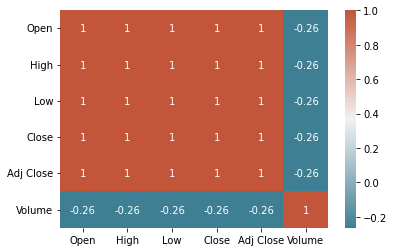

In [23]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
# Open, High,Low, Close and Adj Close have strong postive correlation and Volume has weak negative correlation with all the other columns.

In [24]:
#Display Pearson's correlation coefficient
corr = df.corr(method='pearson')
corr
#Can notice that correlation coeffecients are not exactly 1 and have been rounded off in the above heatmap

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000


In [27]:
import plotly.express as px
fig = px.line(data, x = 'Date', y = 'Open', title = 'Opening stock price 2002-2022')
fig.show()
#Refer to fig 1 in the "EDA pics" folder

In [30]:
fig = px.line(data, x = 'Date', y = 'Close', title = 'Closing stock price 2002-2022')
fig.show()
# We can notice that the opening and closing stock price had been increasing for a few years but in recent times, it has started dropping.
#Refer to fig 2 in the "EDA pics" folder

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 2, cols = 2, subplot_titles=('Highest Stock price for the day','','Lowest stock price for the day'))
fig.add_trace(go.Scatter(x=data.Date, y =data.High,name='High'), row = 1, col = 1)
fig.add_trace(go.Scatter(x=data.Date, y=data.Low, name='Low'), row =2, col = 1)
fig.update_layout(height = 900, width = 1800)
fig.show()
#Refer to fig 3 in the "EDA pics" folder

In [31]:
fig = px.line(data, x='Date', y='Volume', title = 'Number of shares traded')
fig.show()
# The onset of the covid-19 pandemic brought the worst financial crisis since the great recession of 2008. The stock market plummeted further putting people at risk of their investments and income.Due to this people lost faith in the stock market and refused to buy stocks which is why we see a continued decrease in these years. 
# Netflix decided to reduce their subscription fees in order to increase the users on their platform which is why we see a sharp rise in 2022.
#Refer to fig 5 in the "EDA pics" folder

In [32]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data1 = data.groupby('Year')["Volume"].sum()
fig = px.bar(data1, y ='Volume', title = 'Number of shares traded per year', color = 'Volume')
fig.show()
#From the bar plot it can be seen the the maximum number of shares has been traded in the year of 2011.
#In 2021, there was an all time low of shares traded because of high subscription fees,reduced number of users and numerous competitors in the market as well as the reopening of movie theatres.

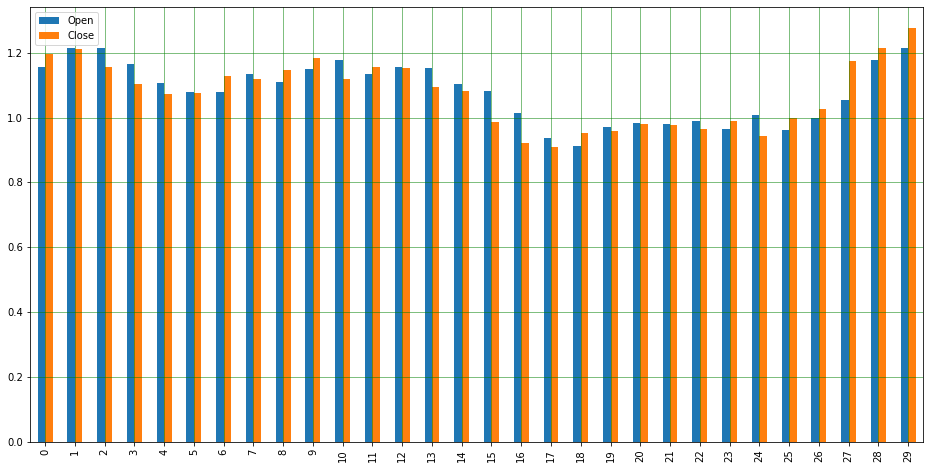

In [33]:
df[['Open','Close']].head(30).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#The bar plot is shown for the first 30 rows and we can see that Opening price is usually more than the closing price due to the fluctuation between the balance of supply and demand.
#Also,development of after-hours trading (AHT) has had an effect on the price of the stock between the closing and opening prices of the following day.

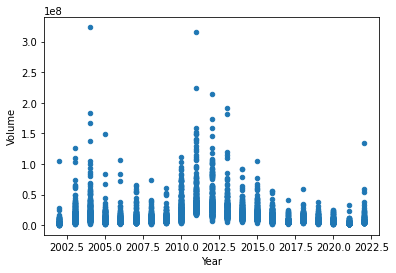

In [34]:
data.plot(kind='scatter', x='Year', y='Volume')
#Outliers can be seen for specific years as this is very probable as this is real-time stock data.

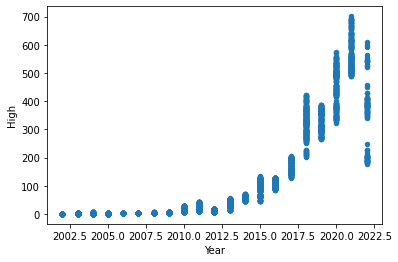

In [35]:
data.plot(kind='scatter', x='Year', y='High')

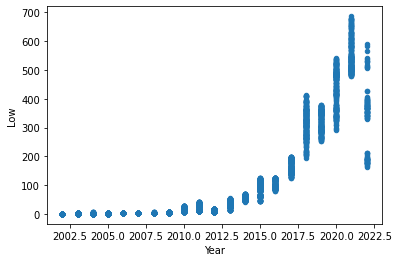

In [36]:
data.plot(kind='scatter', x='Year', y='Low')

It can be seen from the following graph, in general, that as the years goes on, the low,high values increase.

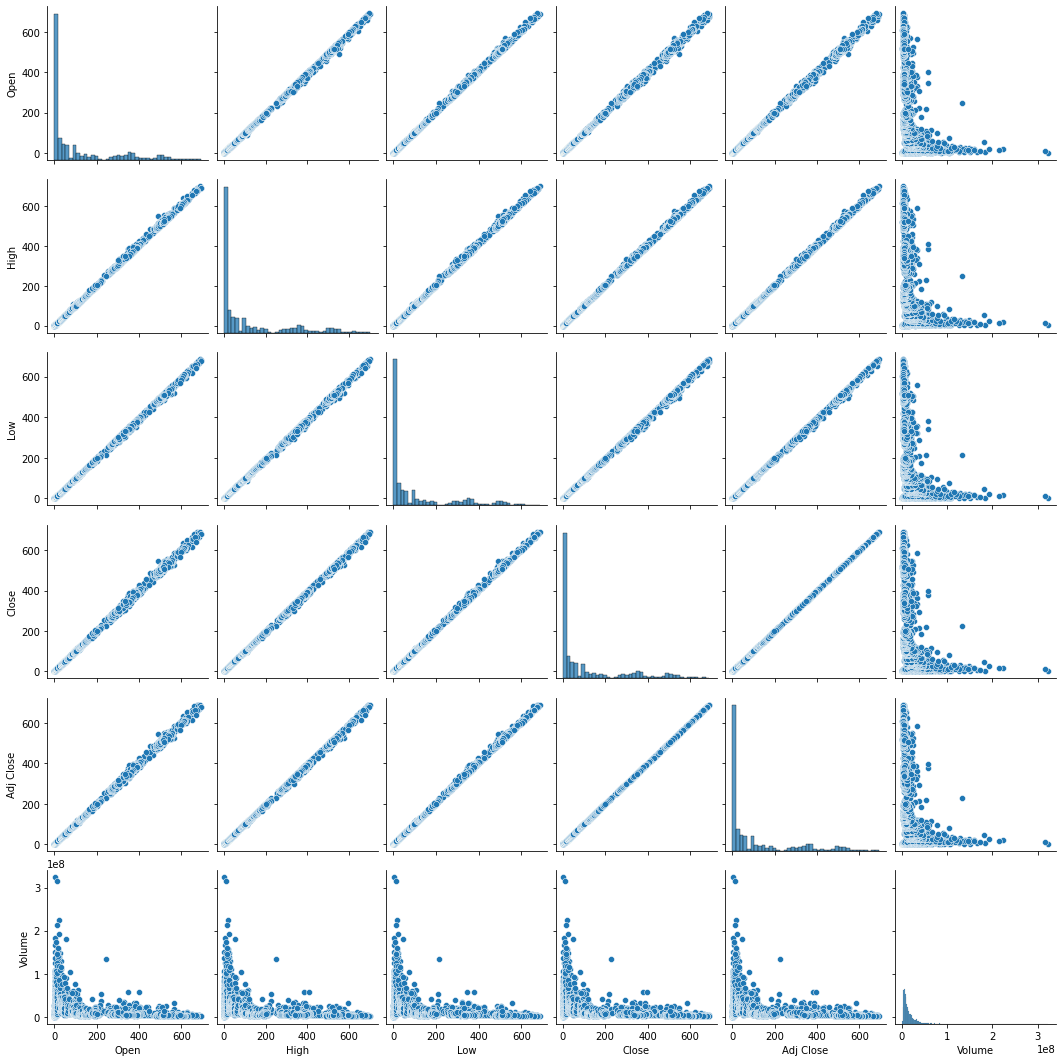

In [37]:
sns.pairplot(df)
#The pairwise scatter plots has been plotted for all attributes.
#It can be seen that, for example, High and Low have an almost linear relationship as well as Close and High. As there are many data points, the graph is clustered.

In [38]:
df_normalised = df.copy()
# apply normalization
for column in df_normalised.columns:
    df_normalised[column] = df_normalised[column]/df_normalised[column].abs().max()
display(df_normalised)
#Normalization has been done on the dataset and will be used according to the model chosen.

,Open,High,Low,Close,Adj Close,Volume
0,0.001670,0.001773,0.001670,0.001730,0.001730,0.324012
1,0.001754,0.001748,0.001745,0.001749,0.001749,0.034336
2,0.001753,0.001758,0.001687,0.001673,0.001673,0.020436
3,0.001682,0.001661,0.001582,0.001595,0.001595,0.020895
4,0.001600,0.001580,0.001562,0.001549,0.001549,0.031397
...,...,...,...,...,...,...
5039,0.279035,0.278535,0.277471,0.282193,0.282193,0.026548
5040,0.283354,0.285239,0.278098,0.285446,0.285446,0.035244
5041,0.286994,0.289220,0.279351,0.278897,0.278897,0.026023
5042,0.277345,0.293114,0.279439,0.296506,0.296506,0.029755
